# Some code on Latent Semantic Indexing

Let's import some packages (numpy and scipy for mathematical computation, matplotlib for plots)

In [50]:
import numpy as np
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
    
%matplotlib inline

We here consider a vocabulary of three terms, i.e., {computer, science, philosophy}, and a set of 2*N documents, equally composed of N documents about computer science and of N documents about literature

In [51]:
terms=np.array(['computer','science','philosophy'])
N=100
mean_cs=np.array([1,1,0])
mean_lit=np.array([0,0,1])
sigma_cs=np.array([.3,.3,.1])
sigma_lit=np.array([.1,.1,.3])
documents_cs=np.abs(sigma_cs*np.random.randn(N,terms.size)+mean_cs)
documents_lit=np.abs(sigma_lit*np.random.randn(N,terms.size)+mean_lit)

Let's pack the two sets of documents and show them in a 3-dimensional scatterplot

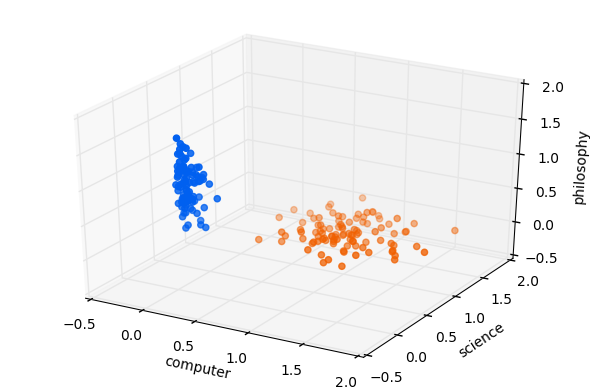

In [52]:

def unpack_columns(A):
    return [A[:,i] for i in range(A.shape[1])]
def scatter(A, colors):    
    fig=plt.figure()
    ax=fig.add_subplot(111, projection='3d')
    ax.scatter(*unpack_columns(A.T), color=colors)
    ax.set_xlabel(terms[0]); ax.set_ylabel(terms[1]); ax.set_zlabel(terms[2])
    plt.tight_layout()
    plt.show()
    
#ax.scatter(*unpack_columns(documents_cs), color='green')
#ax.scatter(*unpack_columns(documents_lit), color='red')
A=np.vstack([documents_cs, documents_lit]).T
colors=np.hstack((np.array(['#F06000']*N),np.array(['#0060F0']*N)))
scatter(A,colors)

We notice two well-discriminated clusters: the former composed of documents with various degree of intensity of the terms "computer" and "science", but low values of "philosophy"; the latter that is hardly described by "computer" and "science", but it contains the term "philosophy" with various intensities 

## Computation of the SVD 

In [53]:
[U, S, V]=np.linalg.svd(A, full_matrices=0)
print('Size of U= %s'%str(U.shape))
print('Size of V= %s'%str(V.shape))
print('Size of Sigma= %s'%str(S.shape))
print("Sigma=%s"%str(S))

Size of U= (3, 3)
Size of V= (3, 200)
Size of Sigma= (3,)
Sigma=[ 14.72538078   9.82337363   3.27009465]


Let us suppose r=3, we compute the SVD decomposition of the matrix of the documents. We can see, from the values of sigma, that the first two singular values are rather higher than the third one. We infer from this that there are two main and more descriptive topics.

Let us see the quality of the approximation with k=2 by computing the Frobenius norm of the two matrices

Frobenius norm ||A||_F =18.0008
Average error ||A-A_k||_F =3.2701


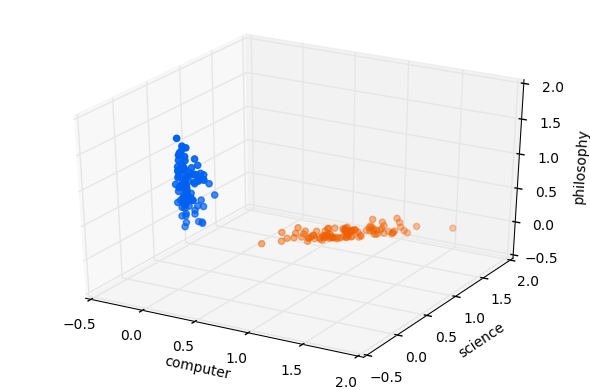

In [54]:
k=2
U_2=U[:,:k]
S_2=np.diag(S[:k])
V_2=V[:k,:]
def frobenius_norm(A1, A2=None):
    if A2 is None:
        A2=0
    return np.sqrt(np.sum(np.power(A1-A2,2)))
A_approx_2=np.dot(U_2,np.dot(S_2, V_2))
     
print('Frobenius norm ||A||_F =%.4f'%frobenius_norm(A))
print('Average error ||A-A_k||_F =%.4f'%frobenius_norm(A,A_approx_2))
scatter(A_approx_2,colors)

## Approximation of the documents in the topic dimensions

We now use the two-topic approximation by discarding the information related to the third dimension.

The two main topics are defined as:

In [105]:
print('Topic/terms \t\t %s'%str(terms))

print('Topic #1 \t\t %s'%str(U[:,0].round(4)))
print('Topic #2 \t\t %s'%str(U[:,1].round(4)))

Topic/terms 		 ['computer' 'science' 'philosophy']
Topic #1 		 [-0.7079 -0.6833 -0.1788]
Topic #2 		 [ 0.133   0.1196 -0.9839]


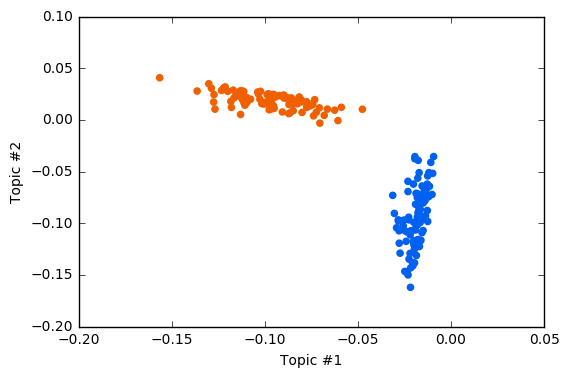

In [84]:

def inv_d(M):
    return np.diag(1/np.diag(M))

A_k_2=V_2
plt.figure()
plt.scatter(A_k_2[0,:],A_k_2[1,:], color=colors)
plt.xlabel('Topic #1'); plt.ylabel('Topic #2');
plt.show()



The samples are even better clusterized, and the range of the cosine similarity among the samples of the same cluster is higher.

We can notice that by considering the <i>Similarity Matrix</i> (SM) among the documents of the sets, where each value is the similarity of each document with respect to the others.

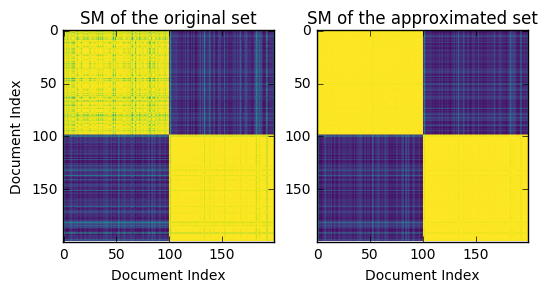

In [81]:
SSM_A=1-squareform(pdist(A.T,'cosine'))
SSM_A_2=-1-squareform(pdist(A_k_2.T,'cosine'))
plt.figure()
plt.subplot(1,2,1)
plt.imshow(SSM_A, cmap='viridis')
plt.title('SM of the original set')
plt.xlabel('Document Index'); plt.ylabel('Document Index');
plt.subplot(1,2,2)
plt.imshow(SSM_A_2, cmap='viridis')
plt.title('SM of the approximated set')
plt.xlabel('Document Index'); 

plt.show()

What happens if we consider only one (the first) topic?

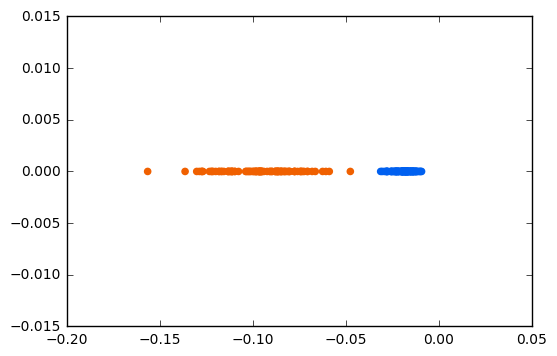

In [83]:
A_k_1=V[:1,:]
plt.figure()
plt.scatter(A_k_1,np.zeros(A_k_1.shape), color=colors)
plt.show()
